# **Setup**

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import geopandas as gpd
import osmnx as ox
print('OSMX Package Version: ' ,ox.__version__)
import networkx as nx

OSMX Package Version:  1.7.1


# **Graph From Place Name**

## **Los Angeles**

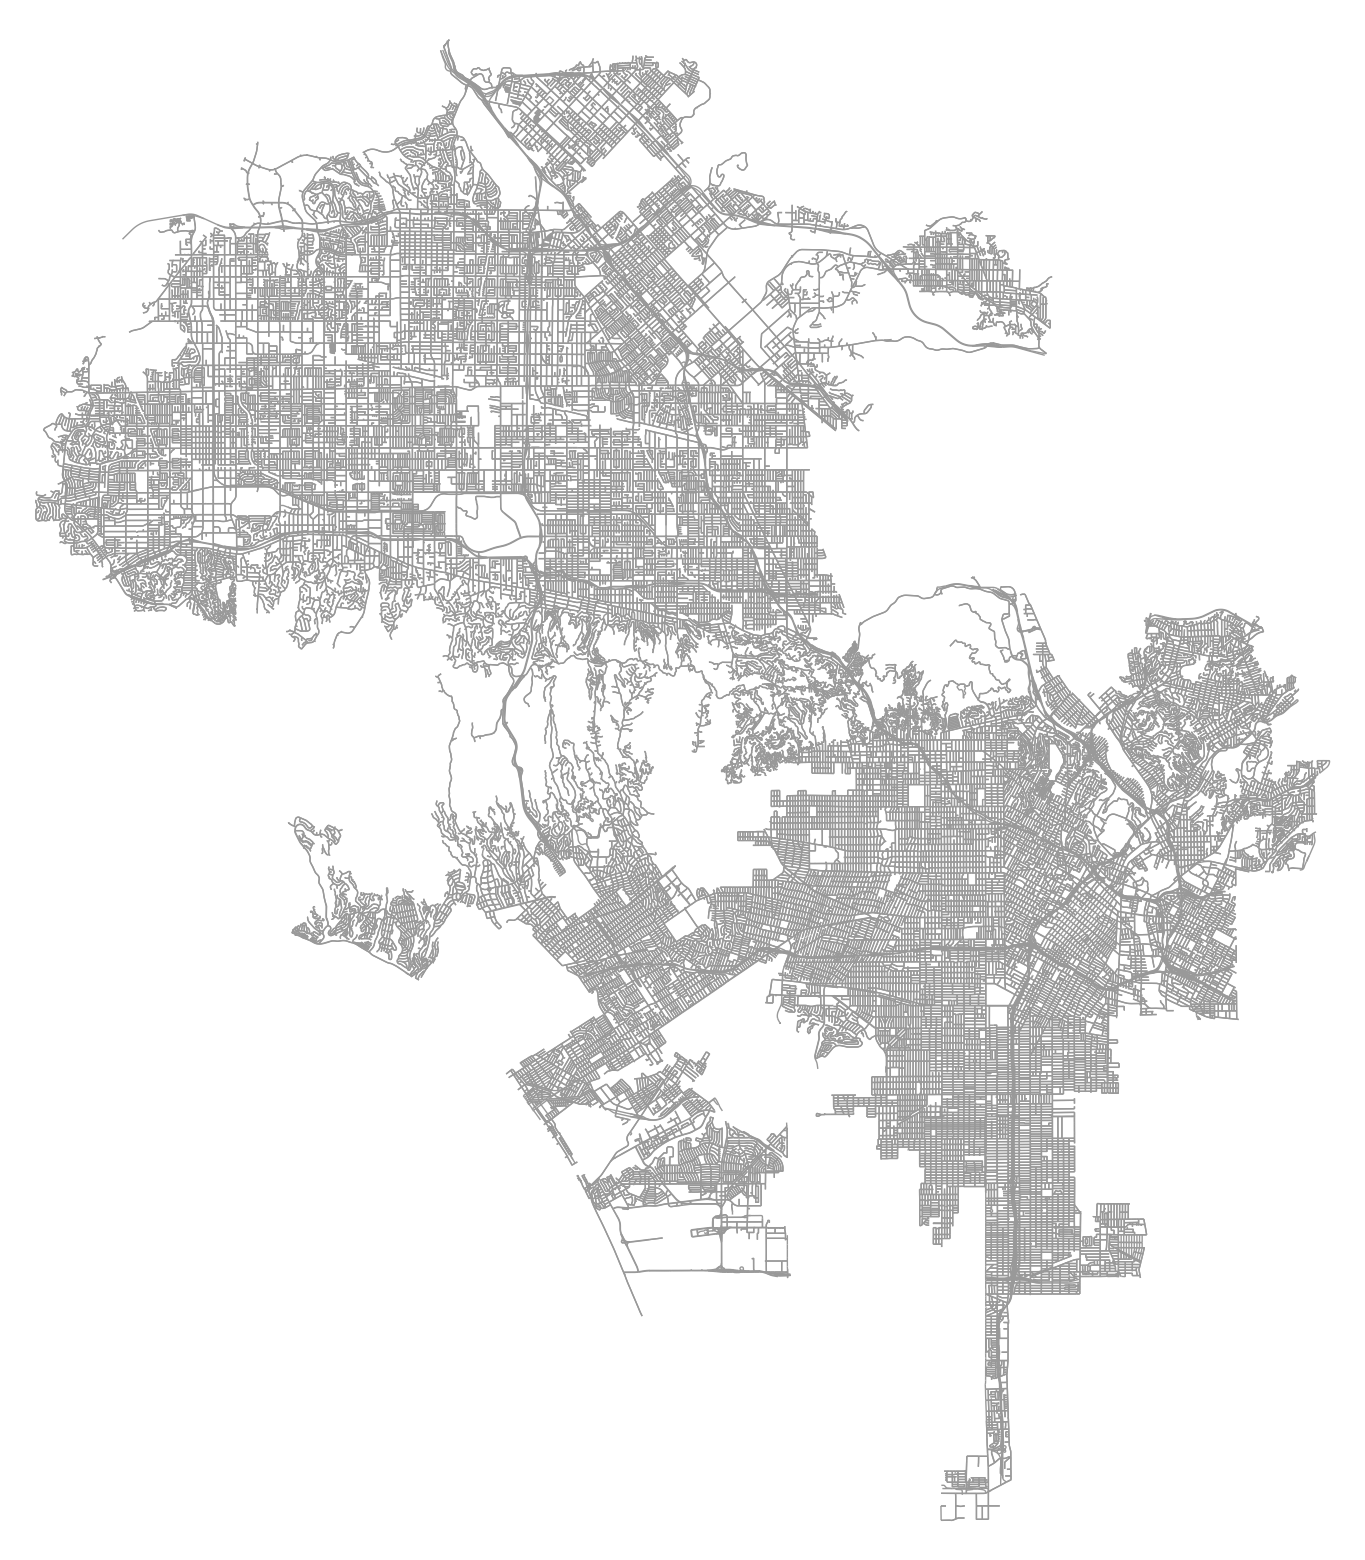

In [6]:
Map_LA = ox.graph_from_place(query="Los Angeles,California,United States",network_type="drive")
fig, ax = ox.plot_graph(Map_LA,figsize=(20,20),bgcolor='#FFFFFF',node_color='black', node_size=0)

## **Bangalore**

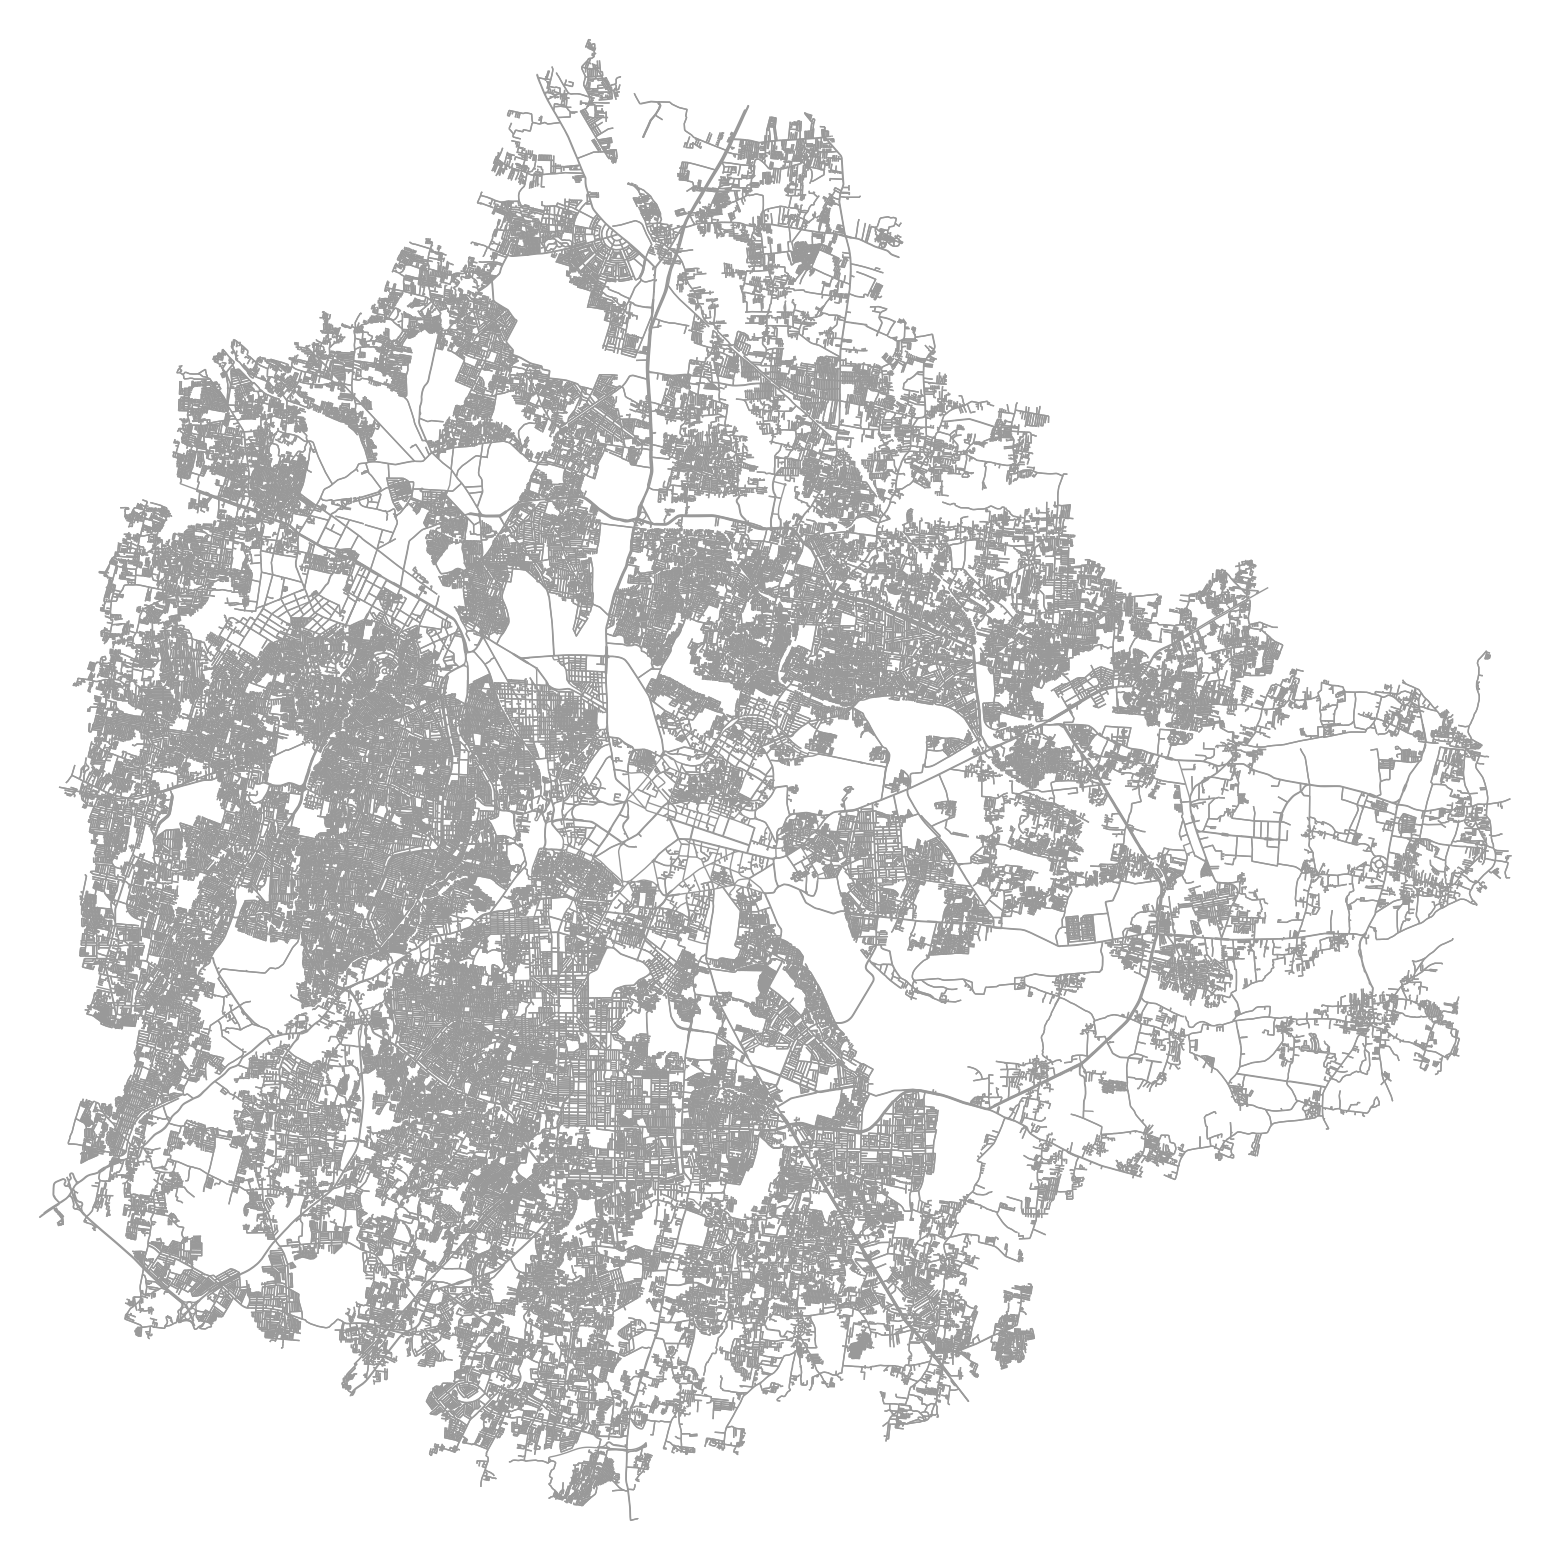

In [23]:
Map_BLR = ox.graph_from_place(query="Bengaluru,Karnataka,India",network_type="drive")
fig, ax = ox.plot_graph(Map_BLR,figsize=(20,20),bgcolor='#FFFFFF',node_color='black',node_size=0)

## **Nashik**

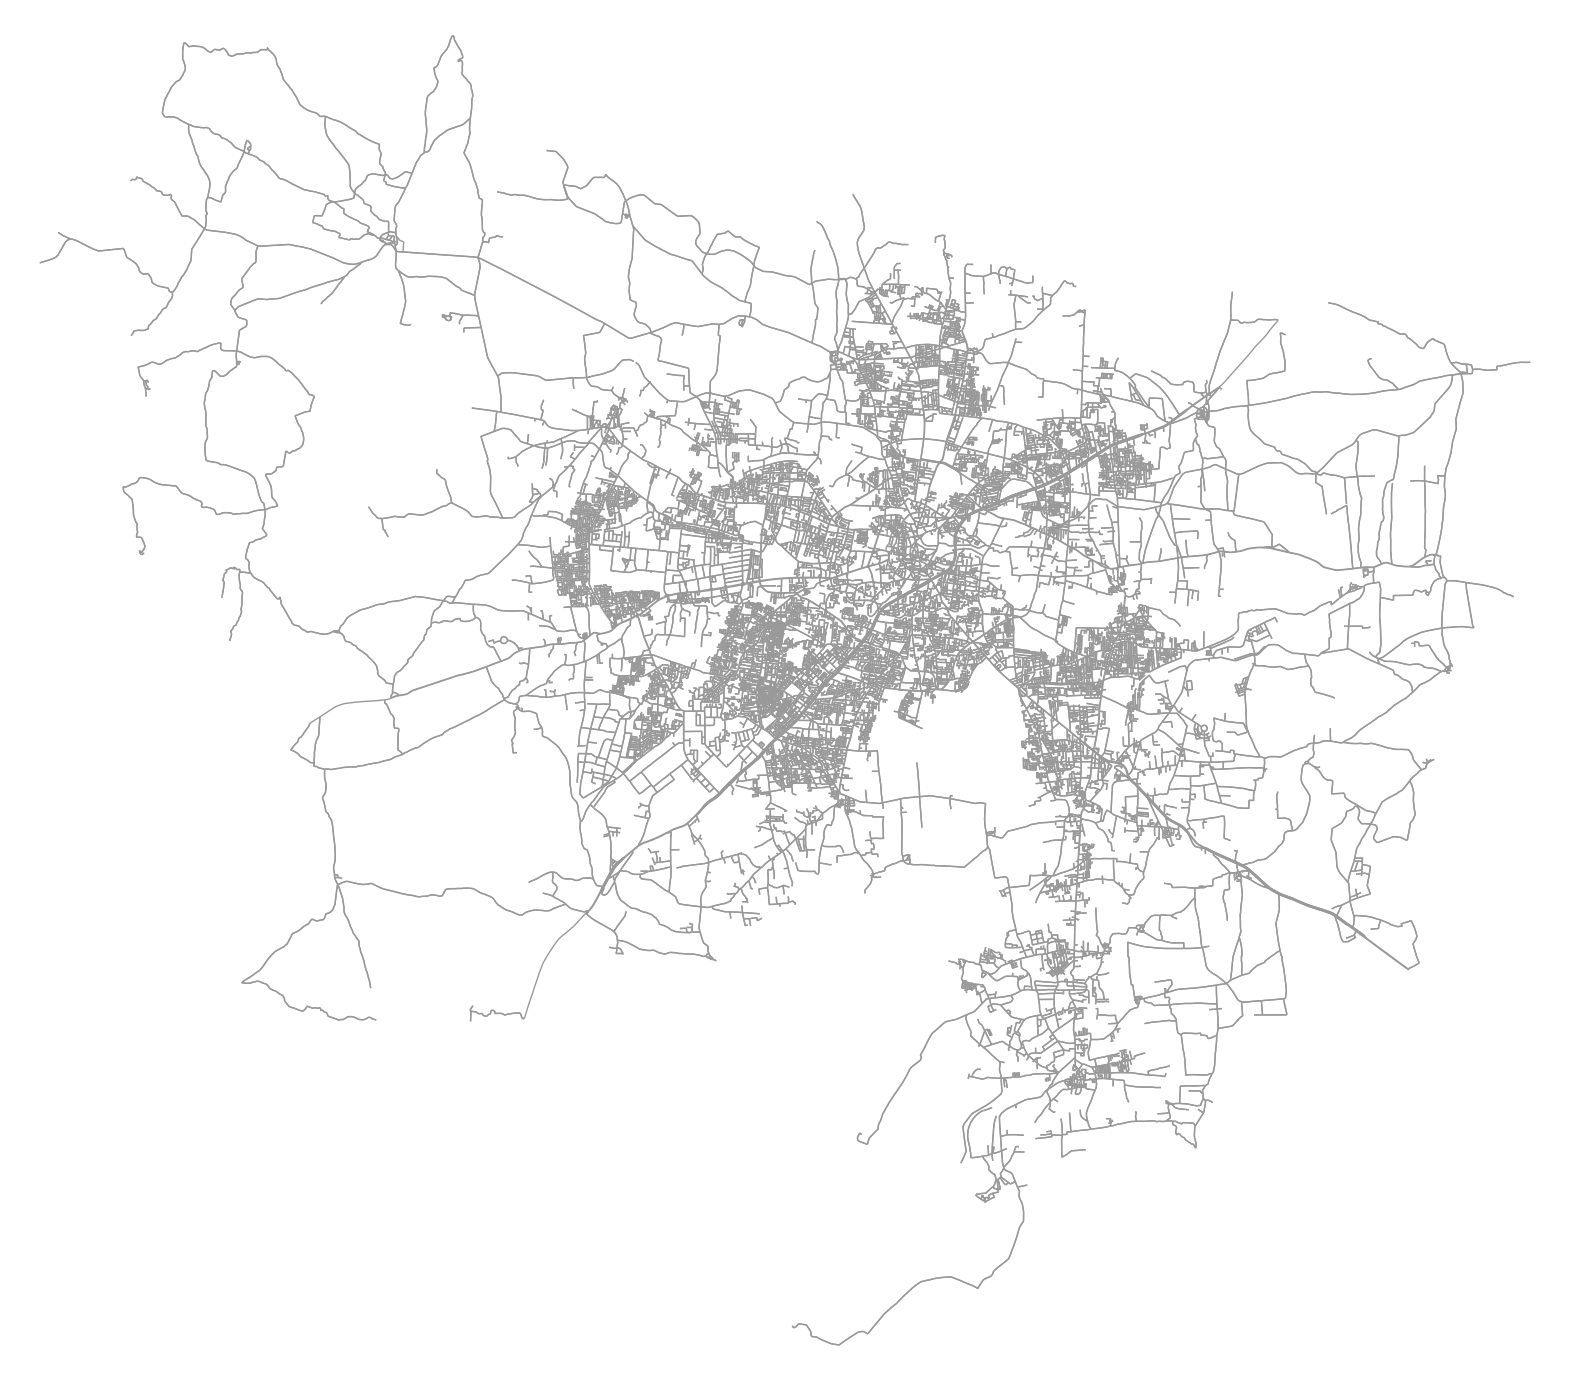

In [24]:
Map_Nashik = ox.graph_from_place(query="Nashik,Maharashtra,India",network_type="drive")
fig, ax = ox.plot_graph(Map_Nashik,figsize=(20,20),bgcolor='#FFFFFF',node_color='black',node_size=0)

# **Calculate Travel Time**

In [10]:
ox.speed.add_edge_speeds(Map_LA, hwy_speeds=None, fallback=None)
ox.speed.add_edge_travel_times(Map_LA)

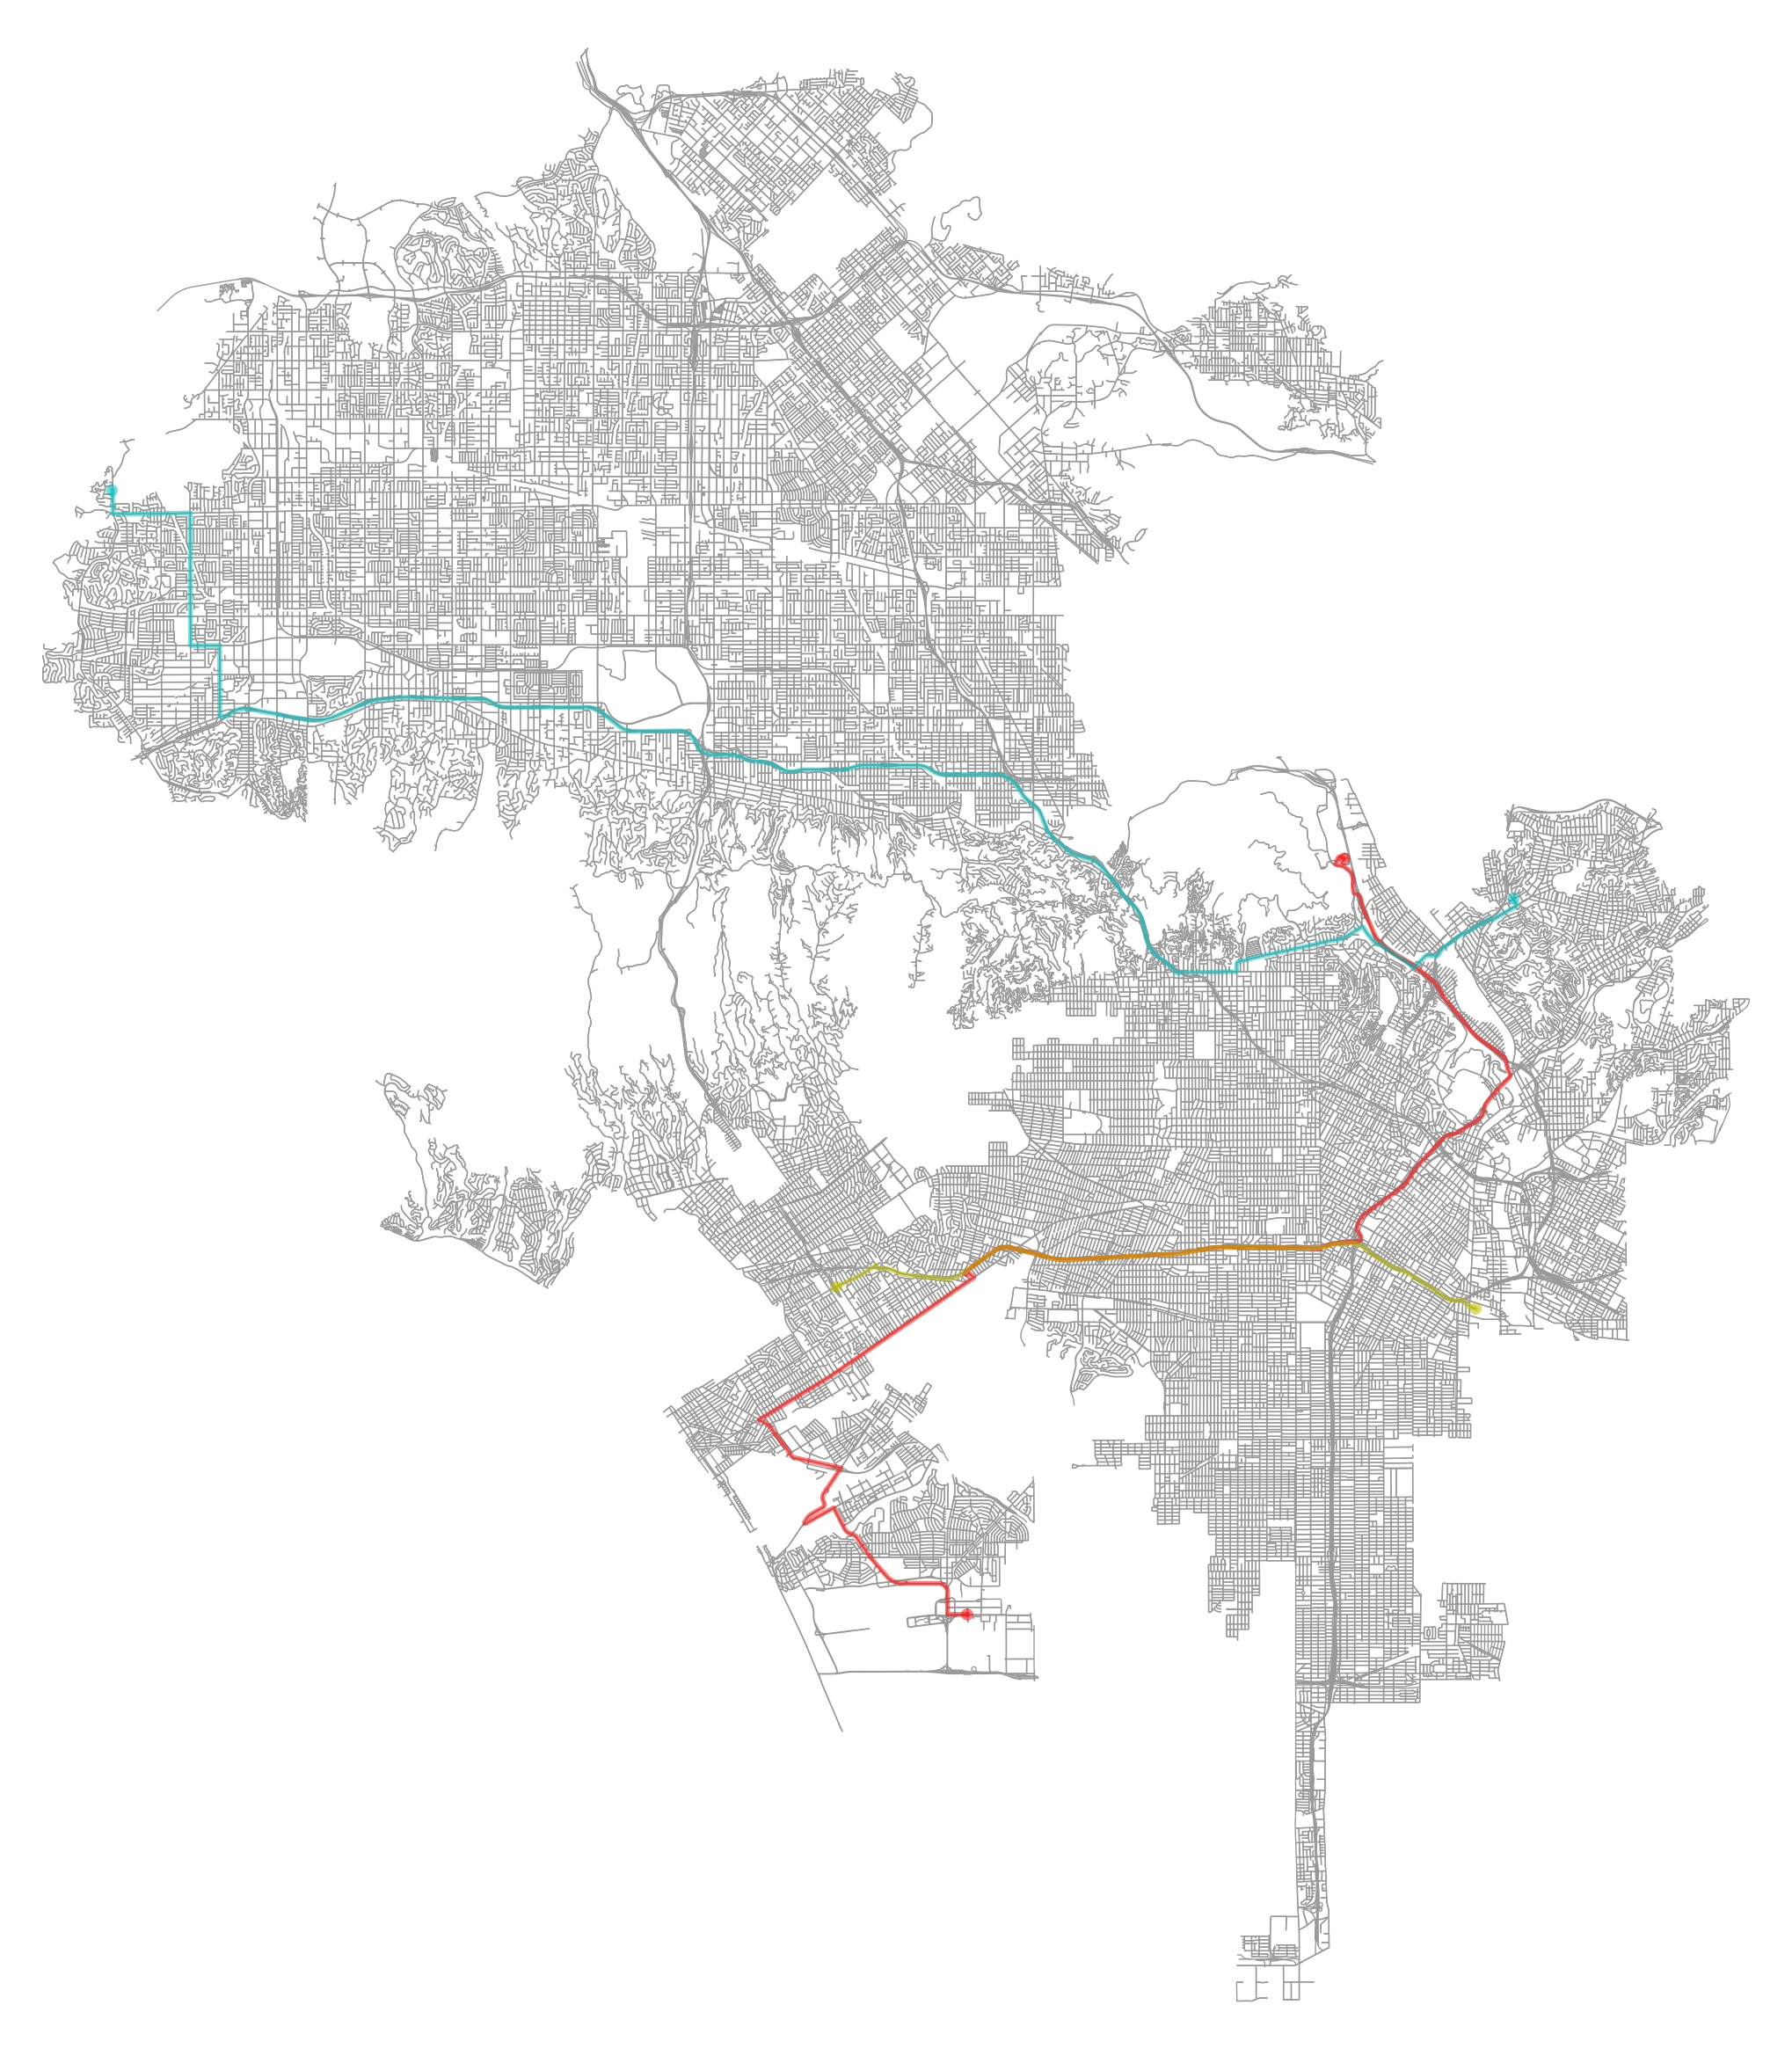

In [13]:
Map_LA = ox.add_edge_speeds(Map_LA)
Map_LA = ox.add_edge_travel_times(Map_LA)

w = 'travel_time'
orig, dest = list(Map_LA)[10], list(Map_LA)[-10]
route1 = nx.shortest_path(Map_LA, orig, dest, weight=w)

orig, dest = list(Map_LA)[0], list(Map_LA)[-1]
route2 = nx.shortest_path(Map_LA, orig, dest, weight=w)

orig, dest = list(Map_LA)[-100], list(Map_LA)[100]
route3 = nx.shortest_path(Map_LA, orig, dest, weight=w)

routes = [route1, route2, route3]
rc = ['r', 'y', 'c']

fig, ax = ox.plot_graph_routes(Map_LA, routes, route_colors=rc, route_linewidth=6,
                               figsize=(30, 30),node_size=0,bgcolor='#FFFFFF')

c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\graph.py:375: UserWarning: The clean_periphery argument has been deprecated and will be removed in a future release. Future behavior will be as though clean_periphery=True.
  G = graph_from_polygon(
c:\Users\aksha\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\graph.py:375: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


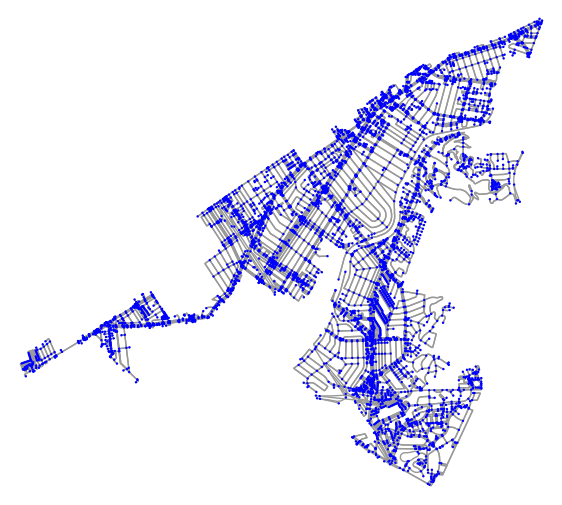

In [14]:
place_name = 'Culver City, California, United States'
G = ox.graph_from_place(place_name, clean_periphery=False,network_type="all_private")

fig, ax = ox.plot_graph(G,figsize=(7,7),bgcolor='#FFFFFF',node_color="b",node_size=3)

# **Geospatial Statistical Measures** 

**Documentation**
* https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.stats.basic_stats

**Basic Statistics**
- Circuitry
- Network Analysis
- Betweeness
- Network Types

## **Circuitry**

### **Manhattan**

In [40]:
# get the network for Manhattan, calculate its basic stats and show the average circuity
Basic_Stats_Manhattan = ox.basic_stats(ox.graph_from_place("Manhattan,New York,United States"))

for key in Basic_Stats_Manhattan.keys():
    print(key, Basic_Stats_Manhattan[key])

n 48562
m 148211
k_avg 6.103990774679791
edge_length_total 5356398.233999943
edge_length_avg 36.14035553366446
streets_per_node_avg 3.444400971953379
streets_per_node_counts {0: 0, 1: 3645, 2: 64, 3: 16233, 4: 28322, 5: 283, 6: 13, 7: 2}
streets_per_node_proportions {0: 0.0, 1: 0.0750586878629381, 2: 0.001317902887031012, 3: 0.33427371195585026, 4: 0.5832132119764425, 5: 0.005827601828590255, 6: 0.0002676990239281743, 7: 4.118446521971912e-05}
intersection_count 44917
street_length_total 3101738.35099997
street_segment_count 83607
street_length_avg 37.09902700730764
circuity_avg 1.0264414369469774
self_loop_proportion 0.0007774468644969919


### **Bangalore**

In [41]:
# Basic Network Stats
Basic_Stats_Bangalore = ox.basic_stats(ox.graph_from_place("Bengaluru,Karnataka,India"))

for key in Basic_Stats_Bangalore.keys():
    print(key, Basic_Stats_Bangalore[key])

n 201165
m 510538
k_avg 5.075813387020605
edge_length_total 31596000.509000637
edge_length_avg 61.88765676404232
streets_per_node_avg 2.65279248378197
streets_per_node_counts {0: 0, 1: 48567, 2: 165, 3: 125304, 4: 26840, 5: 259, 6: 26, 7: 3, 8: 1}
streets_per_node_proportions {0: 0.0, 1: 0.2414286779509358, 2: 0.0008202222056520766, 3: 0.6228916561031989, 4: 0.13342281211940446, 5: 0.0012875003106902294, 6: 0.0001292471354360848, 7: 1.491313101185594e-05, 8: 4.971043670618646e-06}
intersection_count 152598
street_length_total 16686502.092000144
street_segment_count 266469
street_length_avg 62.620800513381084
circuity_avg 1.070886325238478
self_loop_proportion 0.0029759559273311344


### **Nashik**

In [42]:
# Basic Network Stats
Basic_Stats_Nashik = ox.basic_stats(ox.graph_from_place("Nashik,Maharashtra,India"))

for key in Basic_Stats_Nashik.keys():
    print(key, Basic_Stats_Nashik[key])

n 23526
m 61795
k_avg 5.253336733826405
edge_length_total 6627649.093000064
edge_length_avg 107.25219019338238
streets_per_node_avg 2.7399897985207855
streets_per_node_counts {0: 0, 1: 4400, 2: 6, 3: 16461, 4: 2630, 5: 28, 6: 1}
streets_per_node_proportions {0: 0.0, 1: 0.18702711893224516, 2: 0.0002550369803621525, 3: 0.6996939556235654, 4: 0.11179120972541018, 5: 0.0011901725750233785, 6: 4.2506163393692086e-05}
intersection_count 19126
street_length_total 3487270.365999989
street_segment_count 32204
street_length_avg 108.2868701403549
circuity_avg 1.072335049811867
self_loop_proportion 0.0015526021612222085


## **Network Analysis**

## **Betweeness**

## **Network Types**